In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torchvision import datasets
from sklearn.manifold import TSNE
sns.set()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 0.413s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.206464
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.086258
[t-SNE] KL divergence after 1000 iterations: 1.668960


/opt/homebrew/Caskroom/miniconda/base/envs/fowm/lib/python3.10/site-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


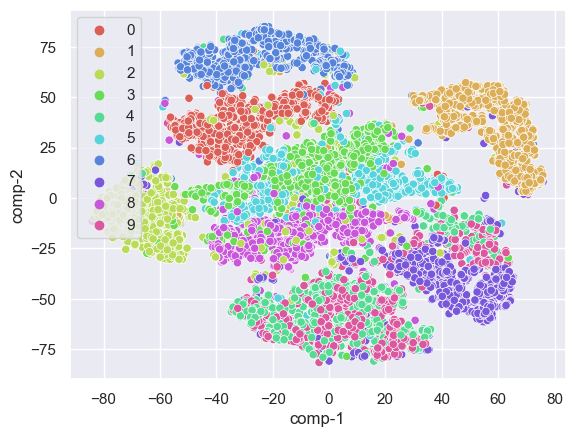

In [7]:
encodings = np.load("encodings_mse.npy")
dataset = datasets.MNIST("data", train=False)

tsne = TSNE(n_components=2, verbose=1, random_state=42)
z = tsne.fit_transform(encodings)

df = pd.DataFrame()
df["y"] = dataset.test_labels.numpy()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(data=df, x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", len(dataset.classes)))
plt.savefig("img/encodings.png")

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.016s...
[t-SNE] Computed neighbors for 10000 samples in 0.244s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.412835
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.837128
[t-SNE] KL divergence after 1000 iterations: 1.304432


/opt/homebrew/Caskroom/miniconda/base/envs/fowm/lib/python3.10/site-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


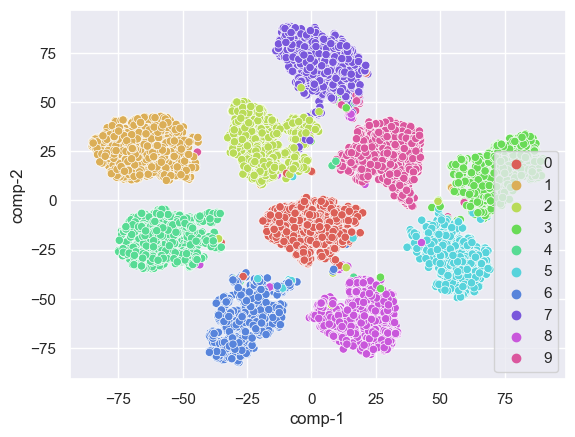

In [6]:
encodings = np.load("encodings_contrastive.npy")
dataset = datasets.MNIST("data", train=False)

tsne = TSNE(n_components=2, verbose=1, random_state=42)
z = tsne.fit_transform(encodings)

df = pd.DataFrame()
df["y"] = dataset.test_labels.numpy()
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(data=df, x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", len(dataset.classes)))
plt.savefig("img/encodings_contrastive.png")